# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Load the dataset.

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

In [ ]:
# Load and unzip the dataset

import zipfile
import os

# Define the path to the zip file
zip_path = "/content/data.zip"

# Define the directory to extract to
extract_dir = "/content/data"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")

Extraction completed.


Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array
from IPython.core.debugger import set_trace

folder_path = "/content/data/data"
img_arrays = []  # list to store image arrays
min_height = -1
min_width = -1
max_height = 0
max_width = 0

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):  # Ensure it's a directory
        for filename in os.listdir(subfolder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(subfolder_path, filename)
                try:
                    img = load_img(img_path)              # Load original size
                    img_array = img_to_array(img)         # Convert to array
                    h, w = img_array.shape[0], img_array.shape[1]
                   # print("original image size =", h, w)
                    # Track min/max
                    min_height = min(min_height, h)
                    min_width = min(min_width, w)
                    max_height = max(max_height, h)
                    max_width = max(max_width, w)

                except Exception as e:
                    print(f"Failed to load {img_path}: {e}")


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

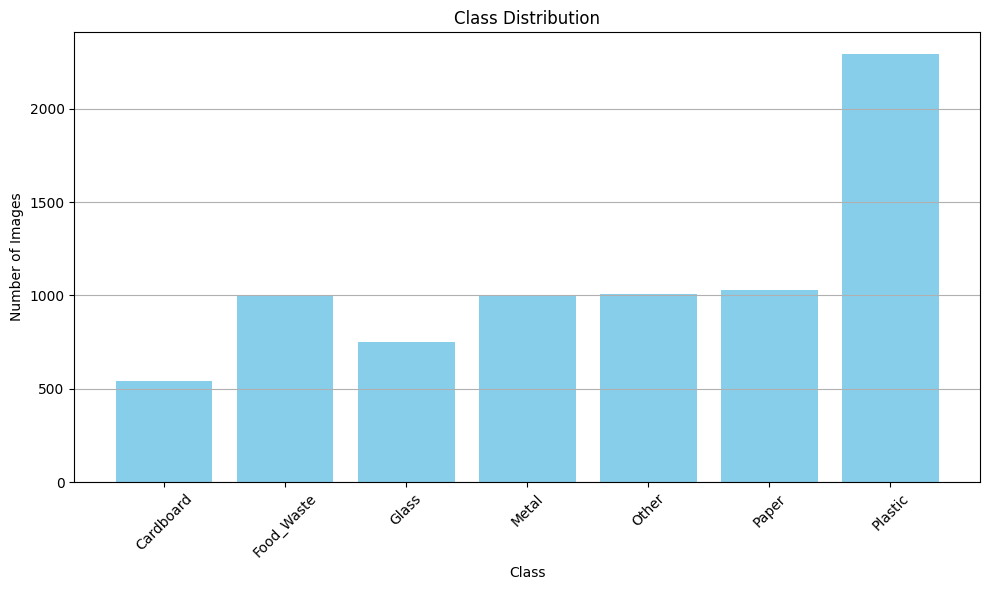

In [ ]:
# Visualise Data Distribution
import os
import matplotlib.pyplot as plt

def plot_class_distribution(data_dir):
    class_counts = {}

    # Count images in each class subdirectory
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len([
                file for file in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, file))
            ])
            class_counts[class_name] = count

    # Sort class names for consistent display
    sorted_classes = sorted(class_counts.keys())
    counts = [class_counts[class_name] for class_name in sorted_classes]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Call the function with your data path
plot_class_distribution("/content/data/data")


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

Classes: ['Metal', 'Plastic', 'Cardboard', 'Other', 'Glass', 'Food_Waste', 'Paper']


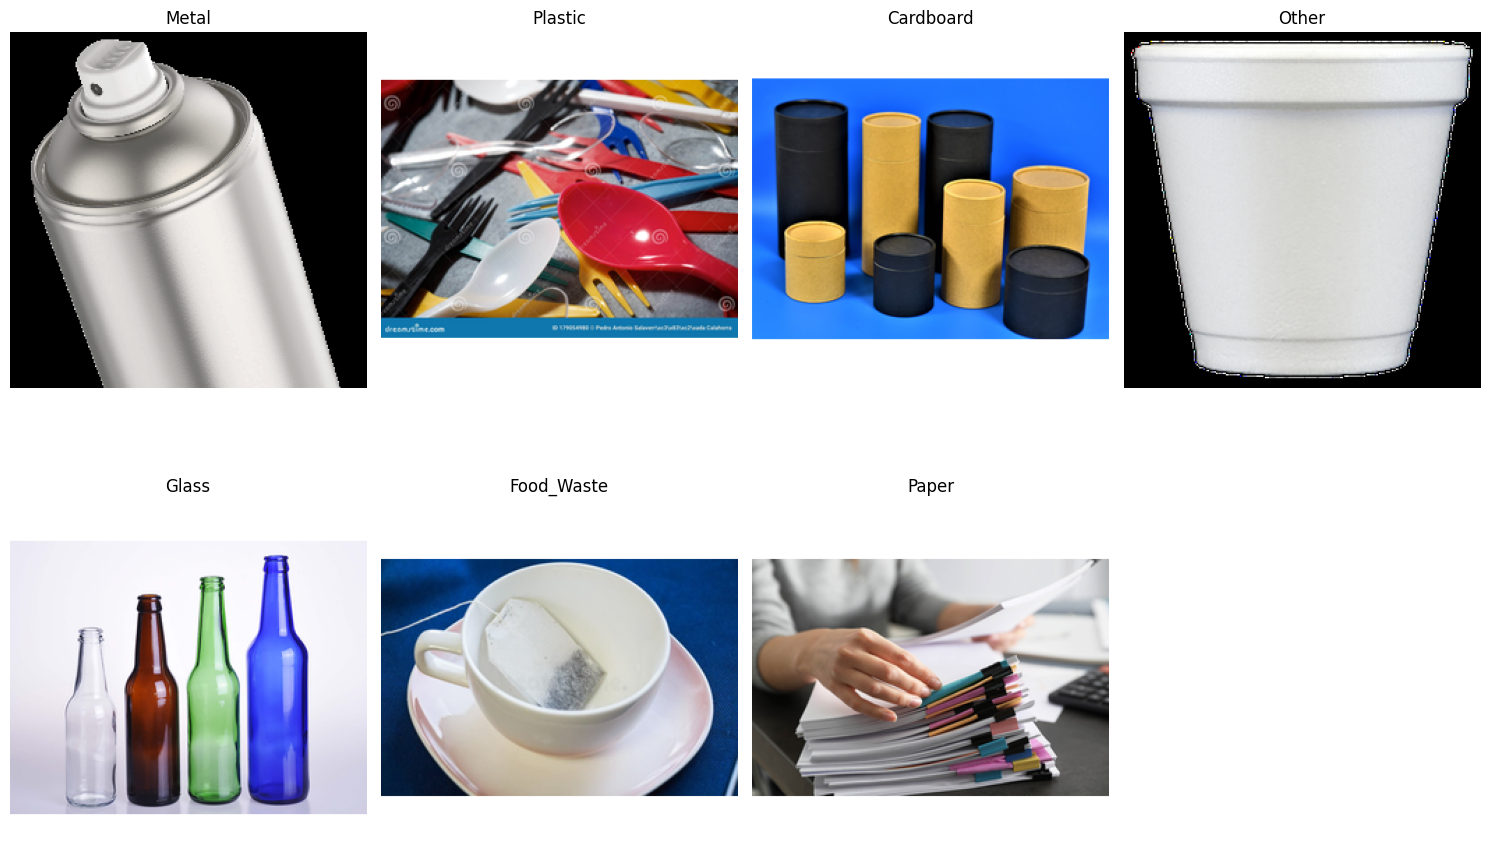

In [ ]:
# Visualise Sample Images (across different labels)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

num_classes_to_show = 7
plt.figure(figsize=(15, 10))

data_dir = "/content/data/data"
class_names = os.listdir(data_dir)
print("Classes:", class_names)

for i, class_name in enumerate(class_names[:num_classes_to_show]):
    class_path = os.path.join(data_dir, class_name)
    img_files = os.listdir(class_path)

    img_path = os.path.join(class_path, random.choice(img_files))
    img = mpimg.imread(img_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [1]:
# Resize the image dimension
print(f"Smallest image dimensions: ({min_height}, {min_width})")
print(f"Largest image dimensions: ({max_height}, {max_width})")

# resizing to (224, 224) while splitting data set as max dimension is 256X256

NameError: name 'min_height' is not defined

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
labels = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic'] # [0, 1, 2, 3, 4, 5, 6]

# Create mapping
label_to_index = {label: idx for idx, label in enumerate(labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

print(label_to_index['Glass']  )
print(index_to_label[2])

2
Glass


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
batch_size = 32
validation_split = 0.2
img_height = 224
img_width = 224
data_path = "/content/data/data"
seed = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_path,
        validation_split=validation_split,
        subset="training",
        seed=seed,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        label_mode = 'categorical'
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_path,
        validation_split=validation_split,
        subset="validation",
        seed=seed,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        label_mode = 'categorical'
    )

print(train_ds.class_names)

Found 7625 files belonging to 7 classes.
Using 6100 files for training.
Found 7625 files belonging to 7 classes.
Using 1525 files for validation.
['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:

# Build and compile the model
def cnn_model(input_shape=(224, 224, 3), num_classes=7, dropout_rate=0.3):
    model = Sequential()

    # 1st Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))

    # 2nd Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))

    # 3rd Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # Categorical classification

    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Model = cnn_model(input_shape=(224, 224, 3), num_classes=7)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training

# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetch to improve performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
# lost trained model due to colab re-start so saving model output after each epoch
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    filepath='/content/epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.h5',
    monitor='val_accuracy',       # or 'val_loss'
    save_best_only=False,         # Set to True to save only the best model
    save_weights_only=False,
    mode='max',                   # Use 'min' if monitoring 'val_loss'
    verbose=1
)

In [ ]:
model_output = Model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_cb]
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4055 - loss: 1.6032
Epoch 1: saving model to /content/epoch_01_valacc_0.41.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 791s 4s/step - accuracy: 0.4055 - loss: 1.6032 - val_accuracy: 0.4111 - val_loss: 1.5754
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4304 - loss: 1.5179
Epoch 2: saving model to /content/epoch_02_valacc_0.43.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 813s 4s/step - accuracy: 0.4304 - loss: 1.5179 - val_accuracy: 0.4315 - val_loss: 1.5000
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4853 - loss: 1.4176
Epoch 3: saving model to /content/epoch_03_valacc_0.43.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 822s 4s/step - accuracy: 0.4852 - loss: 1.4176 - val_accuracy: 0.4348 - val_loss: 1.4642
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5040 - loss: 1.3020
Epoch 4: saving model to /content/epoch_04_valacc_0.45.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 886s 5s/step - accuracy: 0.5040 - loss: 1.3020 - val_accuracy: 0.4485 - val_loss: 1.4084
Epoch 5/10
 27/191 ━━━━━━━━━━━━━━━━━━━━ 10:16 4s/step - accuracy: 0.5326 - loss: 1.2169

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics

from tensorflow.keras.models import load_model
model = load_model('/content/epoch_02_valacc_0.43.h5')

loss, accuracy = model.evaluate(val_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.3477 - loss: 95.1480
Test Loss: 94.2950
Test Accuracy: 0.3416


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
              precision    recall  f1-score   support

   Cardboard       0.04      0.01      0.02        92
  Food_Waste       0.13      0.21      0.16       182
       Glass       0.13      0.11      0.12       157
       Metal       0.13      0.10      0.11       214
       Other       0.10      0.01      0.03       208
       Paper       0.15      0.21      0.18       214
     Plastic       0.30      0.38      0.33       458

    accuracy                           0.19      1525
   macro avg       0.14      0.15      0.13      1525
weighted avg       0.17      0.19      0.18      1525



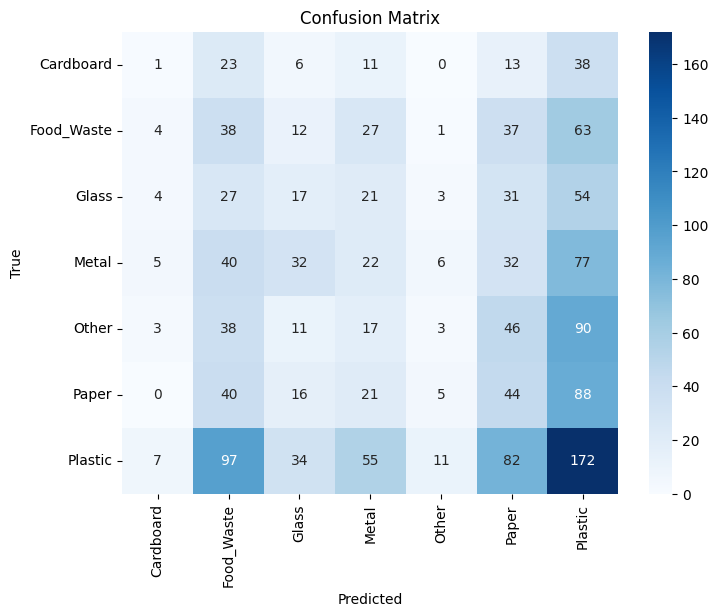

In [ ]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_true is one-hot: convert to labels
y_true = np.concatenate([labels.numpy() for _, labels in val_ds])
y_true = np.argmax(y_true, axis=1)

# Predicted probabilities
y_probs = model.predict(val_ds)
y_pred = np.argmax(y_probs, axis=1)

# Class names
class_names = val_ds.class_names

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* I lost 10th epoch model output result, able to save only 2nd one due to time constraint.
* Following analysis is based on 2nd epoch result

Training Accuracy: 0.4055 (40.55%)

Validation Accuracy: 0.4111 (41.11%)

Training Loss: 1.6032

Validation Loss: 1.5754

It can be observed that, the model is not overfitting as training and validation accuracy is similar. but still underfitting - model hasn't learned class distinctions well yet

* From the confusion matrix - The model currently achieves 19% overall accuracy, with the best performance on the Plastic class due to its higher representation. Other classes like Cardboard and Other are nearly ignored by the model, indicating both class imbalance and insufficient model complexity.

**Next Action**
* Increasing epoch to 20 to 30
* Improve generalization and help the model learn diverse features (NOt attempted due to machine issue)
* Tune the model - Increase convolution layers




